# AOS 51, Spring 2018, Lab #5

# Pandas part 2 

In Lab 4, we focused on Pandas Series. Today, we'll extend our skills into 2D Pandas data sets, which are called DataFrames.

---

In [1]:
import pandas as pd

# Creating DataFrames

Recall from Lab #4, that a Pandas Series is simply a 1D time series of data with an Index (e.g. a range of numbers, a range of dates).

Here are three Series of monthly mean, max, and min temperatures over LA spanning during 2017:

In [2]:
tavg = pd.Series([55.8, 57.2, 61.0, 63.6, 63.3, 66.7, 71.7, 72.0, 71.5, 71.5, 65.6, 61.4])

In [3]:
tmax = pd.Series([62.7, 62.6, 69.3, 71.9, 69.4, 72.6, 77.5, 77.3, 78.5, 80.4, 73.7, 72.4])

In [4]:
tmin = pd.Series([48.8, 51.8, 52.8, 55.4, 57.1, 60.9, 65.8, 66.8, 64.6, 62.5, 57.3, 50.3])

Rather than working on each Series individually, let's combine them into a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

DataFrames are usually abbreviated as "df".

An empty DataFrame is initialized with:

In [8]:
df = pd.DataFrame()

We can populate data into the DataFrame using the syntax:

df[{column name}] = {column data}

where:
   * "column name" is the user-specified name of the column
   * "column data" is the Series (OR list OR 1D numpy array) of data for that column

Let's assign the `tavg` Series a column name of "TAVG" and input that data into the DataFrame.

In [10]:
df['TAVG'] = tavg

In [11]:
df

,TAVG
0,55.8
1,57.2
2,61.0
3,63.6
4,63.3
5,66.7
6,71.7
7,72.0
8,71.5
9,71.5


---
** In-class exercise **

1. Initialize a new and empty DataFrame called "temp_df" 
2. Populate `temp_df` with three columns of data :
   * "TAVG" - 2017 monthly average temperatures over LA
   * "TMIN" - 2017 monthly min temperatures over LA
   * "TMAX" - 2017 monthly max temperatures over LA

---

In [15]:
temp_df = pd.DataFrame()
temp_df['TAVG'] = tavg
temp_df['TMIN'] = tmin
temp_df['TMAX'] = tmax

# DatetimeIndex for DataFrames

Just as we did for Series, we can modify the Index to be a range of dates using the [pd.date_range](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html) function and then reset the DataFrame Index to those dates.

Let's create a date range of months in 2017:

In [16]:
dates = pd.date_range(start='2017-01-01', end='2017-12-01', freq='MS')
dates

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', freq='MS')

Now we can reset the Index of `temp_df` to those dates with:

In [17]:
temp_df.index = dates

In [18]:
temp_df

,TAVG,TMIN,TMAX
2017-01-01,55.8,48.8,62.7
2017-02-01,57.2,51.8,62.6
2017-03-01,61.0,52.8,69.3
2017-04-01,63.6,55.4,71.9
2017-05-01,63.3,57.1,69.4
2017-06-01,66.7,60.9,72.6
2017-07-01,71.7,65.8,77.5
2017-08-01,72.0,66.8,77.3
2017-09-01,71.5,64.6,78.5
2017-10-01,71.5,62.5,80.4


# Shape of DataFrames

Since Pandas is built on top of Numpy, Pandas DataFrames have a "shape" attribute to reveal the number of rows and columns in the DataFrame.

In [19]:
temp_df.shape

(12, 3)

# Slicing DataFrames

Now that we have a full DataFrame, we'll want to slice certain rows and/or columns for further analyses. 


** Slicing a single column **

Extracting a single column from the DataFrame to work with a Series has the syntax:

{user-defined name of Series} = df['{name of column to slice}']

As an example, to extract the "TAVG" column in `temp_df` and rename this now 1D Series of data to "tavg":

In [21]:
tavg = temp_df['TAVG']

This is simply the flipped version of populating the DataFrame with a Series that we entered at the beginning of this lecture (`temp_df['TAVG'] = tavg`). 

---
** In-class exercise **
1. Extract the 'TMIN' and 'TMAX' columns in `temp_df` and assign them the Series names "tmin" and "tmax'.
2. Since Pandas inherits all the core Python functions, how can you prove that "tmin" and "tmax" are Pandas Series data types?
---

** Generalized slicing techniques**

Like Series, we can slice rows/columns either by (1) positions (row numbers) or (2) Index Labels.

Unlike Series, we now need to use two functions to slice DataFrames:

   1. `df.iloc` = slice by index position (the "i" means index location)
   2. `df.loc` = slice by index label

** 1. Slicing by position (df.iloc) **

The general syntax to slice by position is:

`df.iloc[{row_selection}]` 

or with row and column inputs:

`df.iloc[{row_selection}, {column_selection}]`

where row/column selections can be:

   * single value, e.g. [5] 
   * list of values, e.g. [0,1,2]
   * range of values, e.g. [3:6]


Let's demonstrate with examples of `temp_df`:

In [88]:
# Slice rows by position: 1st row (zeroth row index)
temp_df.iloc[0]

TAVG    55.8
TMIN    48.8
TMAX    62.7
Name: 2017-01-01 00:00:00, dtype: float64

In [89]:
# Slice rows by position: 2nd, 3rd, and 4th rows (1st, 2nd, and 3rd row indices)
temp_df.iloc[[1,2,3]]

,TAVG,TMIN,TMAX
2017-02-01,57.2,51.8,62.6
2017-03-01,61.0,52.8,69.3
2017-04-01,63.6,55.4,71.9


In [90]:
# Slice rows by position: range of 5-10th rows (4th-9th indices)
temp_df.iloc[4:10]

,TAVG,TMIN,TMAX
2017-05-01,63.3,57.1,69.4
2017-06-01,66.7,60.9,72.6
2017-07-01,71.7,65.8,77.5
2017-08-01,72.0,66.8,77.3
2017-09-01,71.5,64.6,78.5
2017-10-01,71.5,62.5,80.4


In [91]:
# Slice rows and columns by position: 2nd row, 1st column (1st row index, zeroth column index)
temp_df.iloc[1,0]

57.200000000000003

In [92]:
# Slice rows and columns by position: 1st and 3rd rows, 2nd and 3rd columns (zeroth and 2nd row index, 1st and 2nd column index)
temp_df.iloc[[0,2], [1,2]]

,TMIN,TMAX
2017-01-01,48.8,62.7
2017-03-01,52.8,69.3


In [93]:
# Slice rows and columns by position: range of 5-8th rows, 1-2nd columns (4-7th row indices, 0-1 col indices)
temp_df.iloc[4:8, 0:2]

,TAVG,TMIN
2017-05-01,63.3,57.1
2017-06-01,66.7,60.9
2017-07-01,71.7,65.8
2017-08-01,72.0,66.8


---
** In-class exercise **

1. Slice the 8th row in `temp_df`
2. Slice the 1st, 3rd, and 11th row in `temp_df`
3. Slice the range of 10th-12th rows in `temp_df`
4. Slice the 7th row and 1st column in `temp_df`
5. Slice the 2nd and 5th rows and 1st and 3rd columns in `temp_df`
6. Slice the first five rows of first two columns in `temp_df`
---

** 2. Slicing by labels (df.loc) **

The general syntax to slice by label is:

`df.loc[{row_selection}]` 

or with row and column inputs:

`df.loc[{row_selection}, {column_selection}]`

where row/column selections can be:

   * single index/label value, e.g. ['2017-01-01'] 
   * list of values, e.g. ['2017-01-01', '2017-01-02']
   * range of values, e.g. ['2017-01-01':'2017-01-10']
   
Let's demonstate with examples on `temp_df`.

In [22]:
# Slice rows by label: row of '2017-05-01'
temp_df.loc['2017-05-01']

TAVG    63.3
TMIN    57.1
TMAX    69.4
Name: 2017-05-01 00:00:00, dtype: float64

In [23]:
# slice rows by label: rows of '2017-01-01' and '2017-15-01'
temp_df.loc[['2017-01-01', '2017-05-01']]

KeyError: "None of [['2017-01-01', '2017-05-01']] are in the [index]"

What happened here? 

Sometimes, when you tell Pandas to search for a list of items that are strings (like '2017-05-01'), it does not know to convert them to Pandas Timestamps and search for those Timestamps in the Index. 

So, we need to convert these dates from a string to a Pandas [Timestamp](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Timestamp.html). 

In [96]:
# slice rows by label: rows of '2017-01-01' and '2017-05-01'
temp_df.loc[[pd.Timestamp('2017-01-01'), pd.Timestamp('2017-05-01')]]

,TAVG,TMIN,TMAX
2017-01-01,55.8,48.8,62.7
2017-05-01,63.3,57.1,69.4


**Voila!**

In [49]:
# Slice rows by label: range of months from 2017-01-01 to 2017-05-01
temp_df.loc['2017-01-01':'2017-05-01']

,TAVG,TMIN,TMAX
2017-01-01,55.8,48.8,62.7
2017-02-01,57.2,51.8,62.6
2017-03-01,61.0,52.8,69.3
2017-04-01,63.6,55.4,71.9
2017-05-01,63.3,57.1,69.4


In [58]:
# SLice rows and columns by label: range of months and columns TAVG, TMAX
temp_df.loc['2017-01-01':'2017-06-01',['TAVG','TMAX']]

,TAVG,TMAX
2017-01-01,55.8,62.7
2017-02-01,57.2,62.6
2017-03-01,61.0,69.3
2017-04-01,63.6,71.9
2017-05-01,63.3,69.4
2017-06-01,66.7,72.6


---
** In-class exericse **
1. Using labels, slice row 2017-08-01 and column TMAX
2. Using labels, slice the range of rows 2017-05-01 through 2017-10-01 and columns TAVG and TMIN
3. Using labels, slice rows 2017-03-01, 2017-08-01, 2017-10-01 and column TMIN
---

# DataFrame Arithmetic

Since Pandas is built on top of Numpy, all of the arithmetic we can do with Numpy is included as DataFrame attributes:

   * df.mean(axis=0/1) - take the mean across rows (axis=0) or columns (axis=1)
   * df.min(axis=0/1) - compute the min across rows (0) or columns (1)
   * df.max(axis=0/1) - compute the max across rows (0) or columns (1)
   
For example, we can compute the 2017-mean TAVG, TMIN, and TMAX in `temp_df`:

In [127]:
temp_df.mean(axis=0)

TAVG    65.108333
TMIN    57.841667
TMAX    72.358333
dtype: float64

# Column Arithmetic

Now that we know how to:
   * Create columns in a DataFrame
   * Extract coumns in a DataFrame
   * Code arithmetic using numpy/basic Python
  
we can easily create new columns of data by performing arithmetic on existing columns.

The general syntax is:

df[{user-defined new column name}] = df[existing column] + {whatever you want to do with it!}

For example, let's create new column called "TAVG(C)" where we convert "TAVG" (which is in units degrees F) to degrees C. 

In [25]:
temp_df['TAVG(C)'] = (temp_df['TAVG']-32) * (5/9)
temp_df

,TAVG,TMIN,TMAX,TAVG(C)
2017-01-01,55.8,48.8,62.7,13.222222
2017-02-01,57.2,51.8,62.6,14.000000
2017-03-01,61.0,52.8,69.3,16.111111
2017-04-01,63.6,55.4,71.9,17.555556
2017-05-01,63.3,57.1,69.4,17.388889
2017-06-01,66.7,60.9,72.6,19.277778
2017-07-01,71.7,65.8,77.5,22.055556
2017-08-01,72.0,66.8,77.3,22.222222
2017-09-01,71.5,64.6,78.5,21.944444
2017-10-01,71.5,62.5,80.4,21.944444


---
** In-class exercise **

1. Create a new column called "TMAX(K)" that converts TMAX from Fahrenheit to Kelvin. 

   Note: T(K) = T(F) + 459.67 x (5/9)
2. Create a new column called "TMIN(C-1.2)" that first converts TMIN from Fahrenheight to Celsius and then subtracts 1.2 degrees C from each item. 
---

# Dropping Rows/Columns

Like a houseplant, sometimes we need to prune the DataFrame.

You can remove rows/columns in a DataFrame using the Pandas [drop](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html) function. 

The general syntax is:

df.drop(labels=[{list of rows or columns}], axis={0 for dropping on the index/row, 1 for dropping on the columns}

Let's demonstrate dropping the "TMIN(C-1.2)" column:

In [72]:
pruned_df = temp_df.drop(labels=['TMIN(C-1.2)'], axis=1)
pruned_df

,TAVG,TMIN,TMAX,TAVG(C)
2017-01-01,55.8,48.8,62.7,13.222222
2017-02-01,57.2,51.8,62.6,14.000000
2017-03-01,61.0,52.8,69.3,16.111111
2017-04-01,63.6,55.4,71.9,17.555556
2017-05-01,63.3,57.1,69.4,17.388889
2017-06-01,66.7,60.9,72.6,19.277778
2017-07-01,71.7,65.8,77.5,22.055556
2017-08-01,72.0,66.8,77.3,22.222222
2017-09-01,71.5,64.6,78.5,21.944444
2017-10-01,71.5,62.5,80.4,21.944444


We can also drop rows:

In [101]:
pruned_df = temp_df.drop(labels=[pd.Timestamp('2017-11-01'), pd.Timestamp('2017-12-01')], axis=0)
pruned_df

,TAVG,TMIN,TMAX
2017-01-01,55.8,48.8,62.7
2017-02-01,57.2,51.8,62.6
2017-03-01,61.0,52.8,69.3
2017-04-01,63.6,55.4,71.9
2017-05-01,63.3,57.1,69.4
2017-06-01,66.7,60.9,72.6
2017-07-01,71.7,65.8,77.5
2017-08-01,72.0,66.8,77.3
2017-09-01,71.5,64.6,78.5
2017-10-01,71.5,62.5,80.4


# Plotting DataFrames

Plotting DataFrames has the same syntax as plotting Series:

df.plot(kind={kind of plot}, color={list of colors, length equal to number of columns}, title={give your plot a title!}

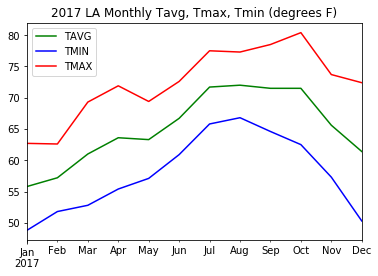

In [116]:
temp_df.plot(kind='line', color=['green', 'blue', 'red'], title='2017 LA Monthly Tavg, Tmax, Tmin (degrees F)')

---
**In-class exercise**

Seasonality of precipitation is vasty different across the US. Here are 2017 monthly precipitation amounts (unit: inches) across a few US cities - San Diego (SD), Miami (MIA), Detroit (DET). 

| |SD|MIA|DET|
|---|---|---|---|
|201701|3.02|3.41|2.84|
|201702|3.71|1.31|1.91|
|201703|0.08|3.93|4.26|
|201704|0.01|2.16|3.55|
|201705|0.92|2.69|4.38|
|201706|0.02|15.97|2.03|
|201707|0.00|12.45|2.44|
|201708|0.00|8.57|3.91|
|201709|0.08|14.97|0.91|
|201710|0.00|12.61|2.84|
|201711|0.02|4.41|4.93|
|201712|0.07|0.66|1.49|

1. Create a DataFrame storing this information with a Datetime Index.
2. Compute the mean precipitation during 2017 for each city. 
3. Create a bar chart of this data.